<a href="https://colab.research.google.com/github/heytanay/depression-sentiment-prediction/blob/master/Depression_Model_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Sentiment Prediction (Part - 1)

## 1. Helper Libraries and Data Imports
### For this Task, I will be using NumPy, Pandas, Matplotlib, NLTK and Wordcloud

In [9]:
import os

try:
  import numpy as np
  import pandas as pd
  import nltk
  from matplotlib import pyplot as plt
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer
  from wordcloud import WordCloud
  nltk.download('punkt')
  nltk.download('stopwords')
except:
  print("Installing Required Dependencies, Please restart the Program thereafter")
  os.system('pip install numpy pandas matplotlib wordcloud nltk')
  nltk.download('punkt')
  nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# Get the Data
raw_data = pd.read_csv("/content/drive/My Drive/training.1600000.processed.noemoticon.csv", encoding='latin-1')
raw_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## 2. Data Cleaning
### As clearly visible, Column names are not proper and our data Consists of a lot of Unneeded Columns (such as Id (That Big Number), Date of Tweet, Query Flag, User handle id). We also need to Change the Target Variables (currently, (0, 4) to (0, 1)). We shall remove this Data Dirt so that we can proceed to the next step which is Mild data exploration

In [26]:
# Let's First give all the columns proper name
new_columns = ['target', 'tweet_id', 'date', 'query_flag', 'user_id', 'text']
raw_data.columns = new_columns

raw_data.sample(5)

,target,tweet_id,date,query_flag,user_id,text
1400270,4,2054365152,Sat Jun 06 07:11:24 PDT 2009,NO_QUERY,soveren,@BentoSet woops no WIWT link
280153,0,1991978295,Mon Jun 01 07:59:44 PDT 2009,NO_QUERY,Dominicanflower,"@YoungQ im blocked here @ work, cant chat"
205648,0,1972929332,Sat May 30 10:09:08 PDT 2009,NO_QUERY,powpowkitty,@greenday86 I'm gonna miss you Papa
1170304,4,1980363488,Sun May 31 06:31:23 PDT 2009,NO_QUERY,beauty_bross,"@LineLoves Or ... You can make a cd, we can he..."
1452216,4,2063117388,Sun Jun 07 01:26:00 PDT 2009,NO_QUERY,nbula19v,had a great time now!!


In [27]:
# Now that the data is a bit more comprehensible, We will drop all the unwanted columns
unwanted_cols = ['tweet_id', 'date', 'query_flag', 'user_id']
raw_data = raw_data.drop(unwanted_cols, axis=1)

raw_data.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [29]:
# Now, the Data looks a lot more cleaner and better to work on, let's change the target variables
# from 0 (Negative - Depressive) and 4 (Positive) --> 0 (Positive) and 1 (Negative - Depressive)

def change_target(x):
  if int(x) == 0:
    return 1
  else:
    return 0

# Let's apply this helper function to the Dataset
raw_data['target'] = raw_data['target'].apply(change_target)

raw_data.head()

,target,text
0,1,is upset that he can't update his Facebook by ...
1,1,@Kenichan I dived many times for the ball. Man...
2,1,my whole body feels itchy and like its on fire
3,1,"@nationwideclass no, it's not behaving at all...."
4,1,@Kwesidei not the whole crew


## 3. Data Exploration using WordCloud

### As we can see, the first many tweets (which seem negative & depressive from the text too) have been labeled 1 (Negative) and similarly the positive ones are now labeled 0 (Positive). This has made our data very easy to work on!
### Now let's use Wordcloud to see the different positive and negative words in form of a WordCloud.

#### I will do this in following steps:


1.   Get a list of all Depressive (Negative) and Positive Words
2.   Generate a Wordcloud
3.   Show the Wordcloud using ```plt.show()```






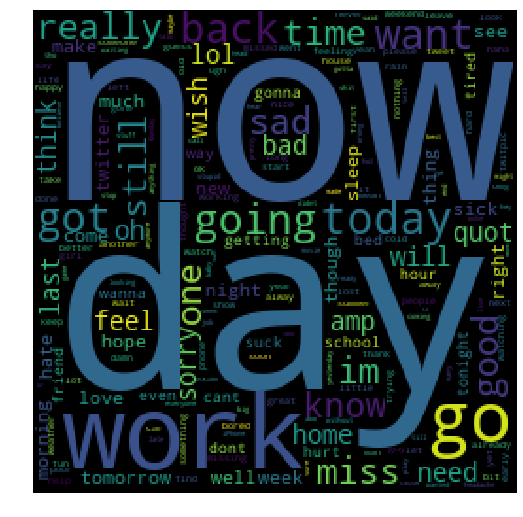

In [34]:
# This is some good old masking technique I prefer to get required data!
depressive_words = " ".join(list(raw_data[raw_data['target'] == 1]['text']))

# Now let's generate our wordcloud
dep_words_cloud = WordCloud(width=256, height=256, collocations=False).generate(depressive_words)

plt.figure(figsize = (7,7))
plt.imshow(dep_words_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

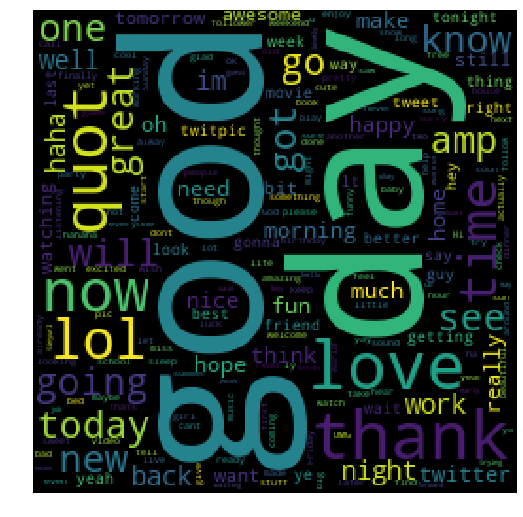

In [35]:
# Now, let's do the same for Positive Words
positive_words = " ".join(list(raw_data[raw_data['target'] == 0]['text']))

# Generate Wordcloud
positive_words_cloud = WordCloud(width=256, height=256, collocations=False).generate(positive_words)

plt.figure(figsize = (7,7))
plt.imshow(positive_words_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 4. Feature Extraction
### We can clearly see the difference between both the WordClouds. The Former WordCloud (Negative one) shows the presence of depressive and negative words. This further reinforces the idea of detecting Depression %-chances from Negative Sentiment Tweets.
### Now is the time to extract important features from the text as it containes a lot of unnecessary words such as "@-references", Hypertext links, general stopwords, etc. 